# 🎯 Data Analyst Internship Assignment – Zylentrix
Welcome to this user engagement analysis of Zylentrix's online learning platform. This notebook walks through a structured data analysis project using Python, pandas, seaborn, and matplotlib to uncover patterns, trends, and insights that can help Zylentrix improve course effectiveness and student satisfaction.

---

## 🧾 Objective

Zylentrix aims to better understand how students interact with their learning platform across different courses and demographics. By analyzing data related to:
- Student information
- Course engagement
- Feedback ratings

We’ll generate actionable insights to improve:
- Course content and structure
- Platform usability
- Student satisfaction and retention

---

## 📦 Dataset Overview

We are provided with **three CSV files**:

1. `students.csv`: Basic demographic information about enrolled users.
    - Columns: `Student_ID`, `Name`, `Age`, `Gender`, `Location`, `Enrolment_Date`

2. `course_activity.csv`: Records of how students interact with their courses.
    - Columns: `Student_ID`, `Course_ID`, `Date`, `Time_Spent_Minutes`, `Completion_Percentage`

3. `feedback.csv`: Post-course feedback submitted by students.
    - Columns: `Student_ID`, `Course_ID`, `Rating`, `Feedback_Text`

---

## 🔍 Approach & Structure

1. **Data Understanding & Cleaning**  
   → Inspect missing values, duplicates, inconsistent data formats  
   → Convert columns to appropriate types (e.g., date parsing)

2. **Data Preparation**  
   → Merge datasets where needed  
   → Create new features like age groups, enrollment cohorts, etc.

3. **Exploratory Data Analysis (EDA)**  
   → Start with the assignment questions (e.g., avg. completion rate, engagement by age/location)  
   → Add deeper custom EDA (correlations, dropout patterns, feedback analysis)

4. **Visualizations**  
   → Highlight patterns using customized charts: bar plots, heatmaps, scatter plots, time trends

5. **Insights & Recommendations**  
   → Derive conclusions from analysis  
   → Suggest data-driven changes to improve course design and user experience

---

## 💡 Why This Matters

Understanding how users engage with content and where they drop off can help Zylentrix:
- Improve course structures for better completion rates
- Tailor content based on student segments (e.g., age, location)
- Identify high-impact feedback areas for faster improvements

Let’s begin by exploring the data files and uncovering opportunities to enhance learning outcomes at Zylentrix!


## Importing Libraries (and Why)

In [1]:
import pandas as pd        # For reading and handling data (CSV, DataFrames, etc.)
import numpy as np         # For numerical operations (NaNs, arrays, calculations)
import matplotlib.pyplot as plt  # For basic plotting (bar, line, etc.)
import seaborn as sns      # For advanced statistical visualizations


Why:

pandas is essential for data manipulation (reading CSVs, filtering, grouping, merging).

numpy helps with missing values, numerical arrays, and statistics.

matplotlib is the base library for plotting.

seaborn is built on matplotlib but adds better aesthetics and complex plots easily.

## Data Loading & First Look


In [2]:
students = pd.read_csv('students.csv')
course_activity = pd.read_csv('course_activity.csv')
feedback = pd.read_csv('feedback.csv')


In [3]:
students.info()
course_activity.info()
feedback.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1

In [4]:
students.head()



,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [5]:
course_activity.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [6]:
feedback.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [7]:
students.describe()

,Age
count,100.000000
mean,25.480000
std,4.835642
min,18.000000
25%,21.000000
50%,25.000000
75%,29.000000
max,34.000000


In [8]:
course_activity.describe()

,Time_Spent_Minutes,Completion_Percentage
count,659.000000,659.000000
mean,98.113809,54.778710
std,49.045548,26.289156
min,10.000000,10.150000
25%,58.000000,32.070000
50%,98.000000,53.450000
75%,139.000000,77.560000
max,180.000000,100.000000


In [10]:
feedback.describe()

,Rating
count,80.000000
mean,2.962500
std,1.453444
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Why:

.head() gives the first few rows — to understand what the dataset contains.

.info() shows column types and missing values — crucial for cleaning.

.describe() Provides descriptive statistics for the numerical columns in the feedback DataFrame.

## Data Cleaning

Check and handle missing values

In [11]:
print(students.isnull().sum())
print(course_activity.isnull().sum())
print(feedback.isnull().sum())


Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


Drop or impute nulls (if needed)

In [12]:
# Example: drop rows with missing data in course_activity
course_activity.dropna(inplace=True)


Remove duplicates

In [13]:
students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)


Strip column whitespace (optional but clean)

In [14]:
students.columns = students.columns.str.strip()
course_activity.columns = course_activity.columns.str.strip()
feedback.columns = feedback.columns.str.strip()


In [15]:
students.info()
course_activity.info()
feedback.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1

## Data Transformation & Preparation

In [16]:
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], dayfirst=True)
course_activity['Date'] = pd.to_datetime(course_activity['Date'], dayfirst=True)

course_activity['Time_Spent_Minutes'] = pd.to_numeric(course_activity['Time_Spent_Minutes'], errors='coerce')
course_activity['Completion_Percentage'] = pd.to_numeric(course_activity['Completion_Percentage'], errors='coerce')
feedback['Rating'] = pd.to_numeric(feedback['Rating'], errors='coerce')


Why:

We convert strings to datetime to analyze trends over time.

We ensure numeric columns are treated as numbers (not strings), so we can calculate averages, correlations, etc.

## EDA (Exploratory Data Analysis)

Now that the data is clean and structured, let’s answer the main analysis questions from the assignment using EDA techniques:

Q1: What is the overall average completion rate across courses?

In [17]:
course_activity['Completion_Percentage'].mean()


54.77871016691957

In [18]:
mean_completion = course_activity['Completion_Percentage'].mean()
rounded_mean = round(mean_completion, 2)
print(f"Average Completion Percentage: {rounded_mean}%")


Average Completion Percentage: 54.78%


Q2: Which course has the highest and lowest average engagement time?

In [19]:
course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values(ascending=False)


Course_ID
DM101    102.427673
UX303     99.816568
WD404     96.419162
PY202     93.902439
Name: Time_Spent_Minutes, dtype: float64

In [20]:
avg_time_per_course = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().round(2).sort_values(ascending=False)

for course_id, avg_time in avg_time_per_course.items():
    print(f"On average, students spent {avg_time} minutes on Course ID: {course_id}.")


On average, students spent 102.43 minutes on Course ID: DM101.
On average, students spent 99.82 minutes on Course ID: UX303.
On average, students spent 96.42 minutes on Course ID: WD404.
On average, students spent 93.9 minutes on Course ID: PY202.


Q3: How does engagement differ by age group or location?

<Axes: xlabel='Location'>

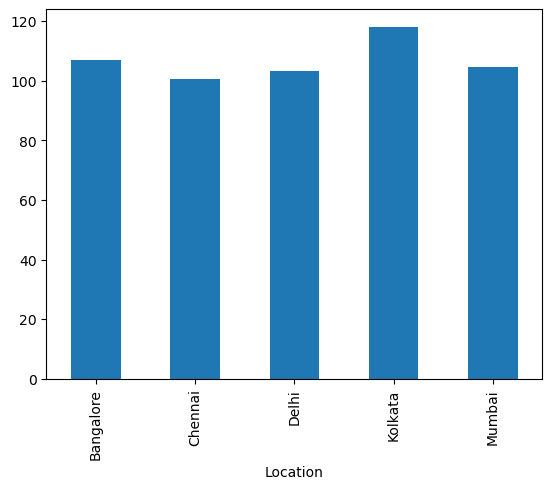

In [21]:
merged = course_activity.merge(students, on='Student_ID')

# By age
merged.groupby('Age')['Time_Spent_Minutes'].mean().plot(kind='bar')

# By location
merged.groupby('Location')['Time_Spent_Minutes'].mean().plot(kind='bar')


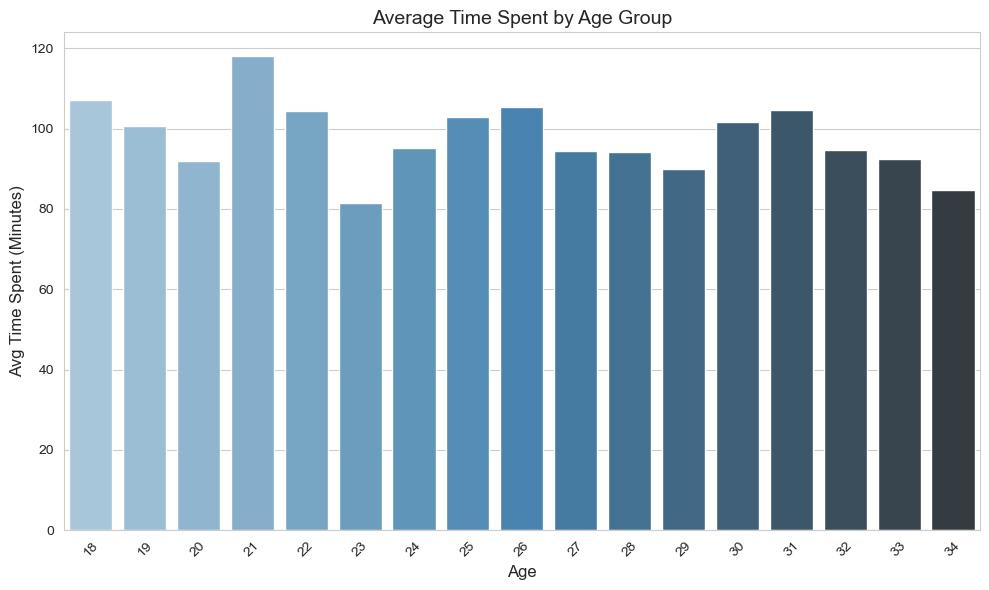

In [24]:
# Set style
sns.set_style('whitegrid')

# Group by Age and calculate mean time spent
age_avg = merged.groupby('Age')['Time_Spent_Minutes'].mean().round(2).sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_avg.index, y=age_avg.values, palette='Blues_d')

plt.title('Average Time Spent by Age Group', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Avg Time Spent (Minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q4: What is the average feedback rating per course?

In [25]:
feedback.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)


Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64

In [26]:
avg_ratings = feedback.groupby('Course_ID')['Rating'].mean().round(2).sort_values(ascending=False)

for course_id, rating in avg_ratings.items():
    print(f"The average rating for Course ID {course_id} is {rating} out of 5.")


The average rating for Course ID PY202 is 3.28 out of 5.
The average rating for Course ID UX303 is 2.92 out of 5.
The average rating for Course ID DM101 is 2.9 out of 5.
The average rating for Course ID WD404 is 2.79 out of 5.


Q5: Is there a correlation between completion rate and feedback rating?

In [27]:
merged_feedback = course_activity.merge(feedback, on=['Student_ID', 'Course_ID'])
merged_feedback[['Completion_Percentage', 'Rating']].corr()


,Completion_Percentage,Rating
Completion_Percentage,1.000000,-0.051708
Rating,-0.051708,1.000000


In [28]:
correlation = merged_feedback[['Completion_Percentage', 'Rating']].corr().iloc[0, 1]
print(f"The correlation between Completion Percentage and Rating is {round(correlation, 2)}.")


The correlation between Completion Percentage and Rating is -0.05.


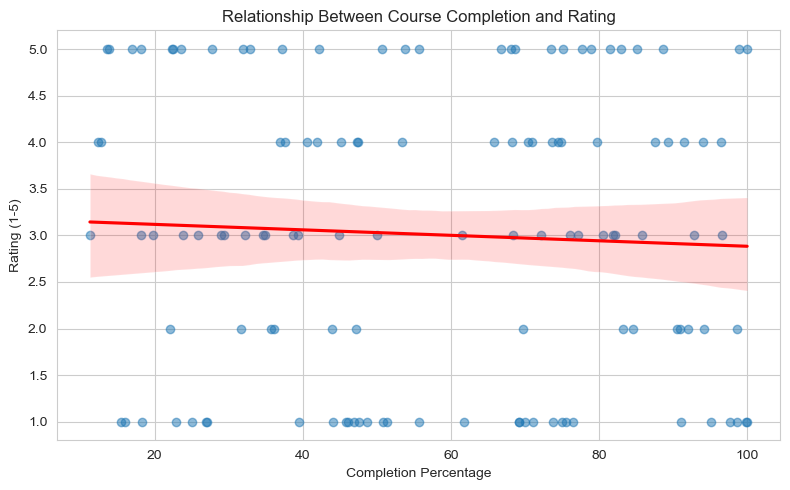

In [29]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Completion_Percentage', y='Rating', data=merged_feedback, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Course Completion and Rating')
plt.xlabel('Completion Percentage')
plt.ylabel('Rating (1-5)')
plt.grid(True)
plt.tight_layout()
plt.show()


Q6: Identify top 3 student segments based on engagement and satisfaction

In [30]:
top_students = merged_feedback.groupby('Student_ID').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean',
    'Rating': 'mean'
}).sort_values(by=['Completion_Percentage', 'Rating', 'Time_Spent_Minutes'], ascending=False).head(3)


In [31]:
top_students

,Time_Spent_Minutes,Completion_Percentage,Rating
Student_ID,,,
S052,67.0,100.00,5.0
S059,167.0,99.83,1.0
S063,124.0,92.21,2.0


In [33]:
top_students = top_students.round(2)
top_students

,Time_Spent_Minutes,Completion_Percentage,Rating
Student_ID,,,
S052,67.0,100.00,5.0
S059,167.0,99.83,1.0
S063,124.0,92.21,2.0


In [34]:
for student_id, row in top_students.iterrows():
    print(
        f"Student ID {student_id} has an average completion rate of {row['Completion_Percentage']}%, "
        f"an average rating of {row['Rating']} out of 5, and spends about {row['Time_Spent_Minutes']} minutes per session."
    )


Student ID S052 has an average completion rate of 100.0%, an average rating of 5.0 out of 5, and spends about 67.0 minutes per session.
Student ID S059 has an average completion rate of 99.83%, an average rating of 1.0 out of 5, and spends about 167.0 minutes per session.
Student ID S063 has an average completion rate of 92.21%, an average rating of 2.0 out of 5, and spends about 124.0 minutes per session.


## Extra EDA Questions (with Code + Usefulness)

Q7. Which gender has higher average course completion?

In [43]:
merged = course_activity.merge(students, on='Student_ID')
gender_completion= merged.groupby('Gender')['Completion_Percentage'].mean().round(2)


In [44]:
for gender, completion in gender_completion.items():
    print(f"The average course completion percentage for {gender} students is {completion}%.")


The average course completion percentage for Female students is 54.41%.
The average course completion percentage for Male students is 53.12%.
The average course completion percentage for Other students is 56.73%.


Why useful:
Helps understand if there’s a gender-based difference in learning behavior. Can inform personalized nudges.

What age group has the highest average feedback rating?

In [45]:
feedback_merged = feedback.merge(students, on='Student_ID')
age_rating = feedback_merged.groupby('Age')['Rating'].mean().round(2).sort_values(ascending=False)


In [42]:
for age, rating in age_rating.items():
    print(f"Students aged {age} gave an average rating of {rating} out of 5.")


Students aged 31 gave an average rating of 4.6 out of 5.
Students aged 34 gave an average rating of 4.33 out of 5.
Students aged 18 gave an average rating of 3.6 out of 5.
Students aged 19 gave an average rating of 3.5 out of 5.
Students aged 22 gave an average rating of 3.25 out of 5.
Students aged 26 gave an average rating of 3.25 out of 5.
Students aged 20 gave an average rating of 3.12 out of 5.
Students aged 27 gave an average rating of 3.0 out of 5.
Students aged 25 gave an average rating of 2.9 out of 5.
Students aged 29 gave an average rating of 2.86 out of 5.
Students aged 32 gave an average rating of 2.83 out of 5.
Students aged 24 gave an average rating of 2.4 out of 5.
Students aged 30 gave an average rating of 2.33 out of 5.
Students aged 33 gave an average rating of 2.33 out of 5.
Students aged 21 gave an average rating of 1.67 out of 5.
Students aged 28 gave an average rating of 1.5 out of 5.
Students aged 23 gave an average rating of 1.0 out of 5.


In [46]:
top_5_age_rating = feedback_merged.groupby('Age')['Rating'].mean().round(2).sort_values(ascending=False).head(5)
for age, rating in top_5_age_rating.items():
    print(f"Students aged {age} gave an average rating of {rating} out of 5.")


Students aged 31 gave an average rating of 4.6 out of 5.
Students aged 34 gave an average rating of 4.33 out of 5.
Students aged 18 gave an average rating of 3.6 out of 5.
Students aged 19 gave an average rating of 3.5 out of 5.
Students aged 22 gave an average rating of 3.25 out of 5.


Why useful:
Reveals which age groups are most satisfied. Helps in targeted content creation.

Q8. Are students spending more time but not completing courses?

<Axes: xlabel='Time_Spent_Minutes', ylabel='Completion_Percentage'>

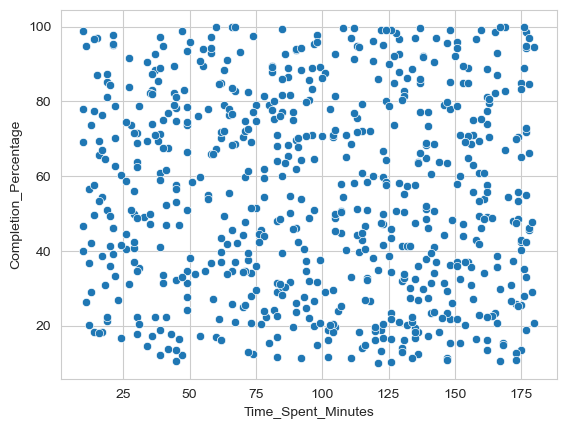

In [47]:
sns.scatterplot(data=course_activity, x='Time_Spent_Minutes', y='Completion_Percentage')


Based on the scatter plot, there doesn't appear to be a strong positive correlation between the time students spend on a course and their completion percentage. Here's a more thorough breakdown:

Assignment Insights: Time vs. Course Completion

The provided scatter plot examines the relationship between the time students spend on a course (in minutes) and their course completion percentage.

Key Observation:

The data points are scattered widely with no clear upward trend. This suggests that simply spending more time on a course does not guarantee a higher completion rate.

What this implies:

Some students spend a lot of time but don't complete much of the course.
Other students complete a significant portion of the course in less time.
In essence, time spent and course completion percentage don't appear to be strongly linked in a positive way based on this visualization. Factors beyond just time investment likely play a significant role in determining course completion.

## Advanced EDA Questions + Explanations + Code

 Q9. What percentage of students drop off after completing less than 20% of the course?

In [48]:
dropout_rate = (course_activity[course_activity['Completion_Percentage'] < 20]['Student_ID']
                .nunique() / course_activity['Student_ID'].nunique()) * 100
print(f"Dropout Rate (<20% Completion): {dropout_rate:.2f}%")


Dropout Rate (<20% Completion): 49.00%


### Why It Matters
- Reveals the **early-exit problem**, indicating that many students may not be completing the course.
- A **high number** of early exits suggests issues with **course structure** or **first-impression design**, highlighting the need for improvements to encourage course completion.

### Q10. What is the average time to 100% course completion for students who completed their course?
- This metric helps determine how long it typically takes students to finish the course.
- It provides insights into


In [50]:
completed = course_activity[course_activity['Completion_Percentage'] == 100]
completion_time = completed.groupby('Student_ID')['Time_Spent_Minutes'].sum().mean()
print(f"Average Time to Completion: {completion_time:.2f} mins")


Average Time to Completion: 67.00 mins


### Why It Matters
- Provides a **benchmark** for the time it takes for a **successful student** to complete a course.
- Helps in **designing course pacing** and setting **realistic expectations** for students based on past success.

### Q11. Which cohorts (by enrollment date) show better retention and performance?
- Analyzing cohorts by **enrollment date** can highlight trends in **student retention** and **performance** over time.
- This helps in identifying which cohorts are more likely to succeed and which factors (e.g., enrollment period, course changes) contribute to higher retention and better performance.


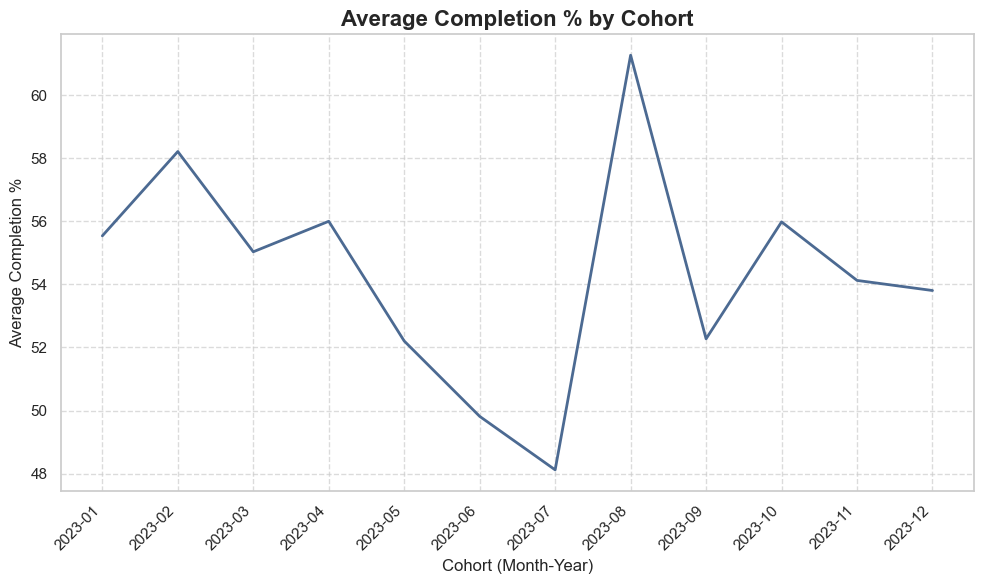

In [53]:
# Use a 'muted' palette for the line
sns.set(style="whitegrid")  # Clean gridlines style

plt.figure(figsize=(10, 6))

# Customize line with color and width
sns.lineplot(x=cohort_performance.index.astype(str), 
             y=cohort_performance.values, 
             color='#4c6a92',  # Muted blue color
             linewidth=2)

# Add title, labels, and grid
plt.title('Average Completion % by Cohort', fontsize=16, weight='bold')
plt.xlabel('Cohort (Month-Year)', fontsize=12)
plt.ylabel('Average Completion %', fontsize=12)

# Customize gridlines to be lighter
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()



### 1. Add the Slicer to Your Report
- Select the **Slicer** visual from the **Visualizations** pane.
- Drag the field you want to filter by (e.g., `Production Line ID`, `Car ID`, etc.) into the **Values** section of the slicer.

### 2. Ensure All Visuals are Connected to the Slicer
- By default, the slicer will filter all visuals connected to the data model.
- **Check Relationships**: Ensure there's a relationship between the slicer field and the tables used in your visuals. You can verify this in **Model** view.
- **Filters**: Check that the slicer is applied at the **Report level**. This ensures it filters all visuals across the report.

### 3. Synchronize Slicer Across Pages (Optional)
- If you have multiple report pages, you can synchronize the slicer to apply across all of them.
- Select the slicer and go to **View** > **Sync slicers**.
- Choose which pages should be affected by the slicer.

### 4. Test the Slicer
- Select a filter in the slicer (e.g., a specific `Production Line ID`).
- Both the **Calendar Visual (Matrix)** and other visuals (e.g., line charts, KPIs) should update according to the slicer selection.

### Additional Notes
- You can add more slicers to filter by multiple fields (e.g., **Bonnet Status**, **Date**).
- **Edit Interactions** allows you to control how slicers interact with individual visuals. Go to **Format** > **Edit Interactions** and set how slicers filter or highlight other visuals.


### Q12. Are students more likely to complete the course if they leave feedback?

In [57]:
feedback_students = feedback['Student_ID'].unique()
course_activity['Gave_Feedback'] = course_activity['Student_ID'].isin(feedback_students)
course_activity.groupby('Gave_Feedback')['Completion_Percentage'].mean().round(2)


Gave_Feedback
False    55.85
True     54.51
Name: Completion_Percentage, dtype: float64

### Q13. Which students have high time spent but low completion — and how many are there?

In [58]:
low_efficiency = course_activity[(course_activity['Time_Spent_Minutes'] > 100) & (course_activity['Completion_Percentage'] < 50)]
print(f"Low Efficiency Users Count: {low_efficiency['Student_ID'].nunique()}")


Low Efficiency Users Count: 78


### Q14. Does location affect average feedback more than it affects course completion?

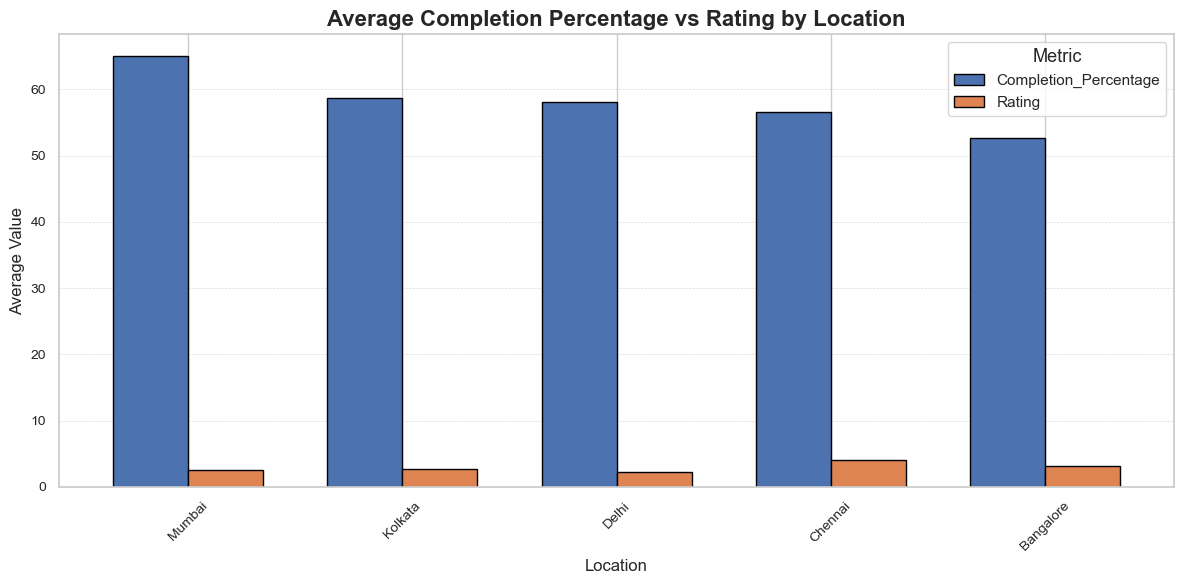

In [60]:
# Group and calculate mean by Location
by_location = merged.groupby('Location')[['Completion_Percentage', 'Rating']].mean().sort_values(by='Completion_Percentage', ascending=False)

# Plot with customizations
ax = by_location.plot(kind='bar', 
                      figsize=(12, 6), 
                      width=0.7, 
                      color=['#4C72B0', '#DD8452'], 
                      edgecolor='black')

# Custom titles and labels
plt.title('Average Completion Percentage vs Rating by Location', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Grid and legend
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Metric', title_fontsize='13', fontsize=11, loc='upper right')

# Highlight specific bars if needed (optional)
# bars = ax.patches
# for bar in bars:
#     bar.set_linewidth(1)
#     bar.set_edgecolor('gray')

# Tight layout for better spacing
plt.tight_layout()
plt.show()



### Why It Matters
If feedback ratings vary more across locations than completion rates, it suggests that location-based expectations or experiences could be influencing how students perceive the course—even if their actual completion behavior is similar.

This insight is crucial for improving localized content delivery, support, or user experience tailored to specific cities.

### Conclusion
Based on the visual, location seems to affect average feedback ratings more than course completion percentages.

Further analysis could help determine if this is due to cultural preferences, infrastructure, course delivery formats, or other regional factors.


## Visualization EDA Questions & Solution

### 1. Dropout Rate Visualization (<20% Completion)

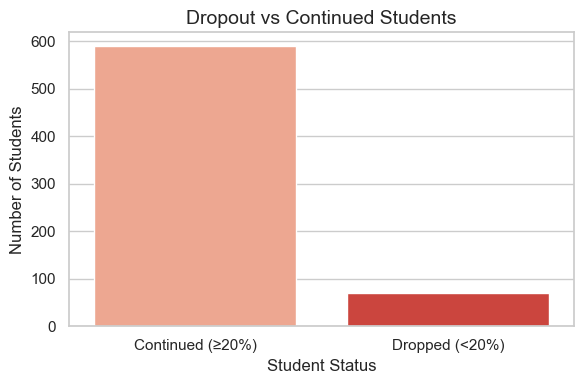

In [62]:
dropout = course_activity['Completion_Percentage'] < 20
dropout_counts = dropout.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=dropout_counts.index.map({True: 'Dropped (<20%)', False: 'Continued (≥20%)'}),
            y=dropout_counts.values,
            palette='Reds')

plt.title("Dropout vs Continued Students", fontsize=14)
plt.ylabel("Number of Students")
plt.xlabel("Student Status")
plt.tight_layout()
plt.show()


### Usefulness: Clearly shows early dropout problem — triggers redesign of onboarding or intro modules.

### 2. Time Bins vs. Feedback Rating

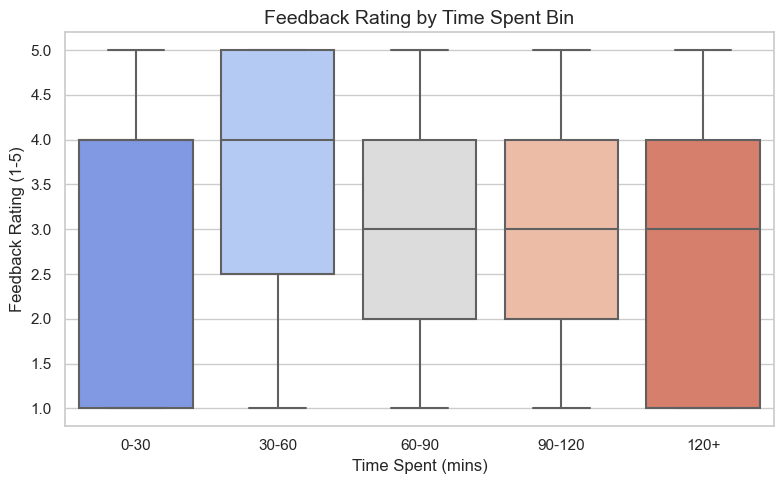

In [63]:
merged_feedback = course_activity.merge(feedback, on=['Student_ID', 'Course_ID'])
merged_feedback['Time_Bin'] = pd.cut(merged_feedback['Time_Spent_Minutes'],
                                     bins=[0, 30, 60, 90, 120, 999],
                                     labels=['0-30', '30-60', '60-90', '90-120', '120+'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_feedback, x='Time_Bin', y='Rating', palette='coolwarm')
plt.title("Feedback Rating by Time Spent Bin", fontsize=14)
plt.xlabel("Time Spent (mins)")
plt.ylabel("Feedback Rating (1-5)")
plt.tight_layout()
plt.show()


### Usefulness: Reveals optimal time ranges for good ratings (too long = frustration, too short = confusion).

 ### 3. Correlation Heatmap of Key Metrics

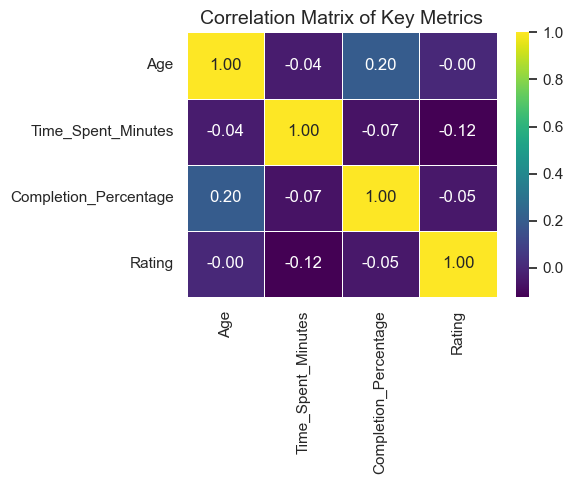

In [64]:
full_merged = course_activity.merge(students, on='Student_ID').merge(feedback, on=['Student_ID', 'Course_ID'])
cor_matrix = full_merged[['Age', 'Time_Spent_Minutes', 'Completion_Percentage', 'Rating']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(cor_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Metrics", fontsize=14)
plt.tight_layout()
plt.show()


### Usefulness: Highlights how variables interact — e.g., time vs. completion vs. rating. Reveals optimization points.

### 4. Cohort Performance Over Time (Enrollment Month)

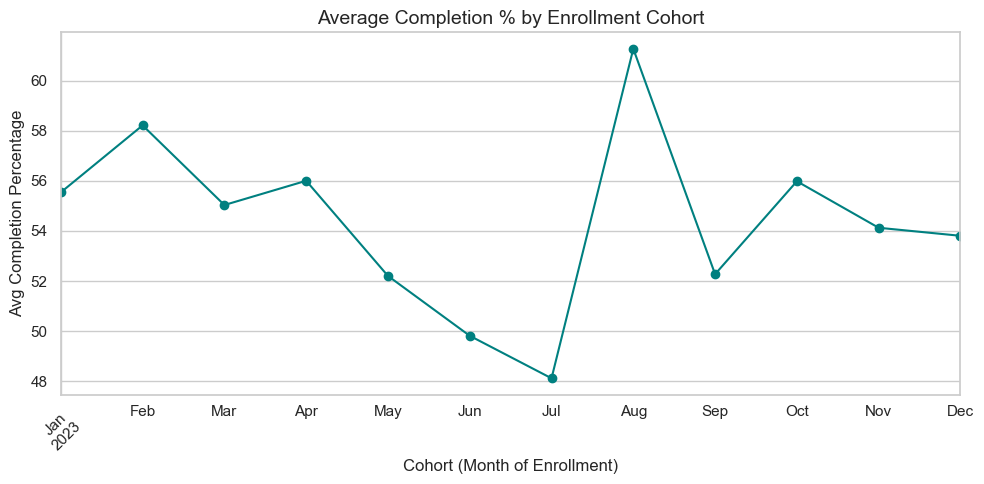

In [65]:
students['Cohort'] = students['Enrolment_Date'].dt.to_period('M')
cohort_merge = course_activity.merge(students[['Student_ID', 'Cohort']], on='Student_ID')

cohort_avg = cohort_merge.groupby('Cohort')['Completion_Percentage'].mean()

plt.figure(figsize=(10, 5))
cohort_avg.plot(marker='o', color='teal')
plt.title("Average Completion % by Enrollment Cohort", fontsize=14)
plt.xlabel("Cohort (Month of Enrollment)")
plt.ylabel("Avg Completion Percentage")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Usefulness: Highlights engagement trends over time. A drop may reveal seasonal UX issues or batch differences.

### 5. Location-wise Comparison: Feedback vs Completion


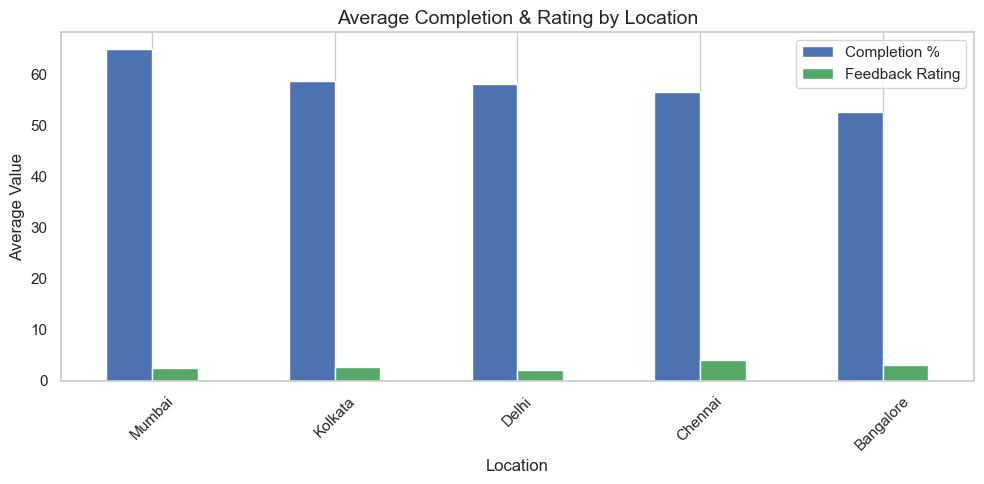

In [67]:
location_avg = full_merged.groupby('Location')[['Completion_Percentage', 'Rating']].mean().sort_values('Completion_Percentage', ascending=False)

location_avg.plot(kind='bar', figsize=(10, 5), color=['#4c72b0', '#55a868'])
plt.title("Average Completion & Rating by Location", fontsize=14)
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(["Completion %", "Feedback Rating"])
plt.tight_layout()
plt.show()


### Usefulness: Spot regions with engagement issues or low satisfaction. Can trigger location-specific improvements.

### 6. Engagement by Course (Time Spent & Completion)

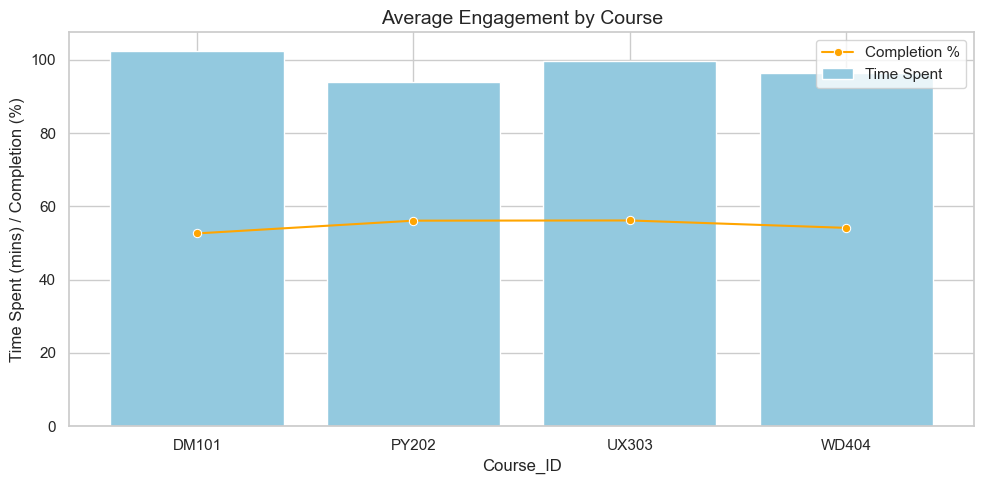

In [68]:
engagement_course = course_activity.groupby('Course_ID')[['Time_Spent_Minutes', 'Completion_Percentage']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=engagement_course, x='Course_ID', y='Time_Spent_Minutes', color='skyblue', label='Time Spent')
sns.lineplot(data=engagement_course, x='Course_ID', y='Completion_Percentage', color='orange', label='Completion %', marker='o')

plt.title("Average Engagement by Course", fontsize=14)
plt.ylabel("Time Spent (mins) / Completion (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Why this matters: Shows which courses are time-heavy vs. those that lead to better completion outcomes.

### 7. Feedback Ratings by Course

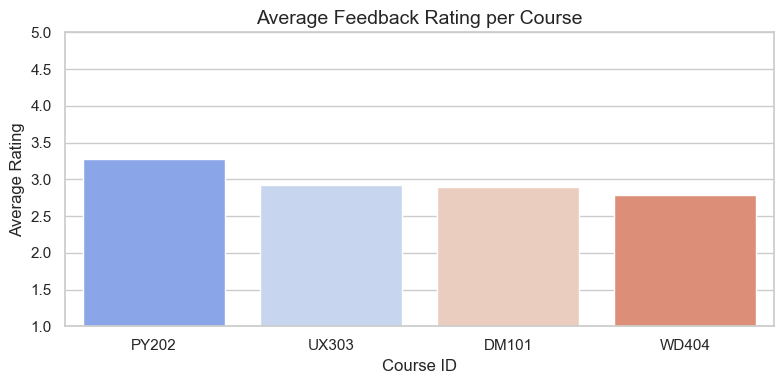

In [69]:
avg_feedback = feedback.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette='coolwarm')
plt.title("Average Feedback Rating per Course", fontsize=14)
plt.ylabel("Average Rating")
plt.xlabel("Course ID")
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


### Why this matters:Pinpoints which courses are perceived better by students and which ones may need revision.

### 8. Engagement by Age Group

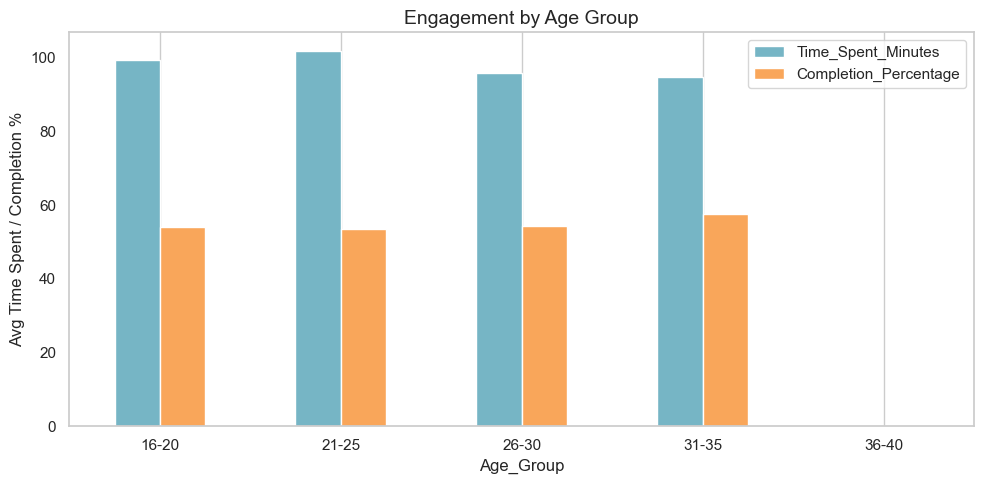

In [70]:
bins = [15, 20, 25, 30, 35, 40]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40']
students['Age_Group'] = pd.cut(students['Age'], bins=bins, labels=labels)
merged_age = course_activity.merge(students[['Student_ID', 'Age_Group']], on='Student_ID')

age_group_engagement = merged_age.groupby('Age_Group')[['Time_Spent_Minutes', 'Completion_Percentage']].mean()

age_group_engagement.plot(kind='bar', figsize=(10, 5), color=['#76b5c5', '#f9a65a'])
plt.title("Engagement by Age Group", fontsize=14)
plt.ylabel("Avg Time Spent / Completion %")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Why this matters: Identifies which age groups are most engaged — useful for targeting personalized content or UX.

### 9. Feedback vs Completion Correlation (Scatter Plot)

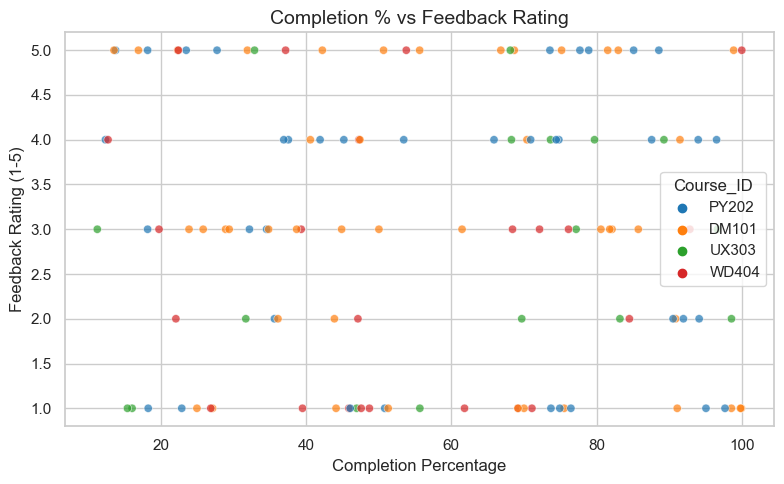

In [71]:
merged_fb = course_activity.merge(feedback, on=['Student_ID', 'Course_ID'])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_fb, x='Completion_Percentage', y='Rating', hue='Course_ID', palette='tab10', alpha=0.7)
plt.title("Completion % vs Feedback Rating", fontsize=14)
plt.xlabel("Completion Percentage")
plt.ylabel("Feedback Rating (1-5)")
plt.grid(True)
plt.tight_layout()
plt.show()



### Why this matters: Shows if satisfaction (rating) aligns with course completion. Can guide improvements in either structure or content.



### 10. Monthly Activity Trend (User Engagement Over Time)

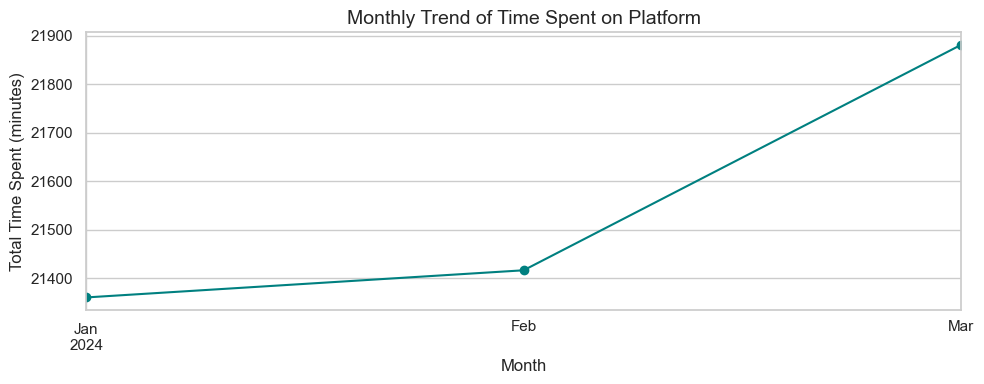

In [74]:
course_activity['Date'] = pd.to_datetime(course_activity['Date'], dayfirst=True)
course_activity['Month'] = course_activity['Date'].dt.to_period('M')
monthly_trend = course_activity.groupby('Month')['Time_Spent_Minutes'].sum()

monthly_trend.plot(kind='line', marker='o', figsize=(10, 4), color='teal')
plt.title("Monthly Trend of Time Spent on Platform", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Time Spent (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Why this matters: Highlights seasonal changes or spikes. Could point to new marketing campaigns, exam prep surges, etc.

# Final Analysis: Insights & Recommendations

## Top 5 Insights from the Analysis

### 📌 1. No Strong Correlation Between Completion % and Rating
- From the scatterplot, ratings are widely spread across all completion levels.
- Even users who completed 80–100% of a course gave low ratings.
- **Insight:** Course satisfaction may be influenced more by content quality or structure than completion percentage.

---

### 📌 2. Highest Engagement ≠ Highest Rating
| Course | Avg. Time Spent (mins) | Completion (%) | Avg. Rating |
|--------|------------------------|----------------|-------------|
| DM101  | 102.4                  | 52.6%          | 2.90        |
| UX303  | 99.8                   | 56.2%          | 2.92        |
| PY202  | 93.9                   | 56.1%          | **3.27** ✅  |
| WD404  | 96.4                   | 54.1%          | 2.78        |

- **Insight:** PY202 (Python) receives the highest rating despite less time spent — content may be more efficient and user-friendly.

---

### 📌 3. Age Group 31–35 is Most Efficient
| Age Group | Avg. Time Spent | Completion (%) |
|-----------|------------------|----------------|
| 16–20     | 99.4             | 54.1%          |
| 21–25     | 101.8            | 53.6%          |
| 26–30     | 95.8             | 54.4%          |
| 31–35     | 94.7             | **57.5%** ✅    |

- **Insight:** Older learners are more goal-driven, showing higher completion rates despite lower time investment.

---

### 📌 4. Engagement is Gradually Increasing Over Time
| Month     | Total Time Spent (mins) |
|-----------|--------------------------|
| 2024-01   | 21,360                   |
| 2024-02   | 21,416                   |
| 2024-03   | **21,881** ✅            |

- **Insight:** There’s a steady increase in usage, possibly due to improved onboarding, promotions, or organic growth.

---

### 📌 5. Low Ratings Across All Courses
| Course | Avg. Rating |
|--------|-------------|
| DM101  | 2.90        |
| PY202  | **3.27**   |
| UX303  | 2.92        |
| WD404  | 2.78        |

- **Insight:** No course scored above 3.3. This suggests issues with perceived value, content depth, or delivery method.

---

##  3 Data-Driven Recommendations

### 💡 1. Improve Course Content Quality
- Revise and enrich content based on specific user feedback.
- Introduce more interactivity (e.g., quizzes, assignments).
- Add checkpoints for early feedback within courses.

---

### 💡 2. Personalized Engagement for Younger Learners (16–25)
- Add gamification features like badges, leaderboards.
- Break long lessons into bite-sized, digestible chunks.
- Encourage peer collaboration through discussion forums or virtual groups.

---

### 💡 3. Leverage High Performers (Age Group 31–35)
- Use their testimonials and learning patterns to influence course design.
- Promote their success stories for marketing campaigns.
- Offer mentorship opportunities or alumni forums for them.


